## Clustering of Beverages
### Using K-means and Agglomerative Clustering

#### Harjyot Singh Bagga (18BCE0694)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Part of the dataset
df=pd.read_csv("Data/clustering/bev.csv")
df.head(5)

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


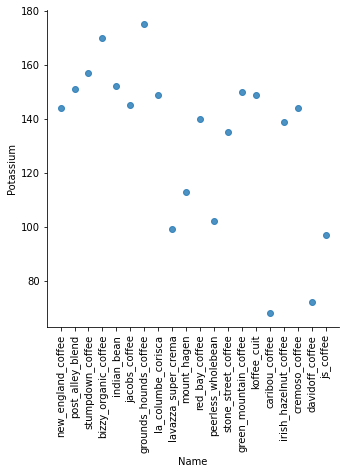

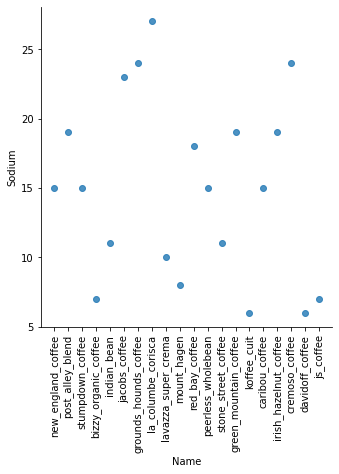

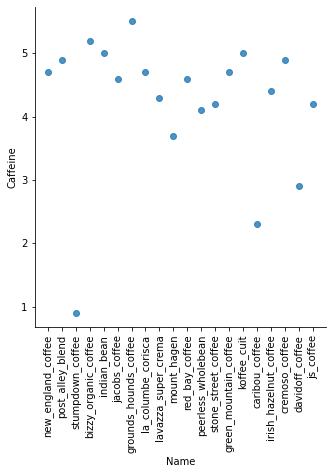

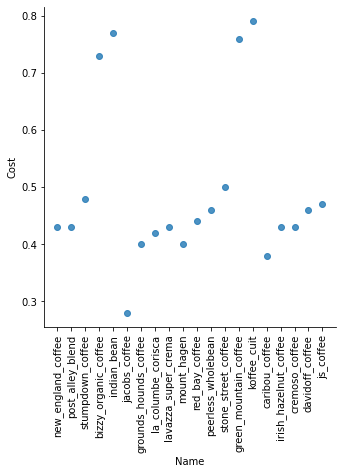

In [4]:
# Visualizing relations of beverages with each feature.

bev_ds = df
g = sn.lmplot("Name","Potassium",data=bev_ds,fit_reg=False, size=5)
g.set_xticklabels(rotation=90)
g = sn.lmplot("Name","Sodium",data=bev_ds,fit_reg=False, size=5)
g = g.set_xticklabels(rotation=90)
g = sn.lmplot("Name","Caffeine",data=bev_ds,fit_reg=False, size=5)
g.set_xticklabels(rotation=90)
g = sn.lmplot("Name","Cost",data=bev_ds,fit_reg=False, size=5)
g.set_xticklabels(rotation=90)

In [5]:
feature_df = df.drop(labels='Name', axis=1)

In [6]:
# Features of the dataset
feature_df.head()

,Potassium,Sodium,Caffeine,Cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


In [7]:
# Standardization of all features (to help with precise clustering)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_df=scaler.fit_transform(feature_df)
feature_df[:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

### Performing K-means clustering

In [8]:
from sklearn.cluster import KMeans
clusters=KMeans(3)
clusters.fit(feature_df)

KMeans(n_clusters=3)

In [9]:
df['k_means_cluster_id'] = clusters.labels_
df

,Name,Potassium,Sodium,Caffeine,Cost,k_means_cluster_id
0,new_england_coffee,144,15,4.7,0.43,1
1,post_alley_blend,151,19,4.9,0.43,1
2,stumpdown_coffee,157,15,0.9,0.48,0
3,bizzy_organic_coffee,170,7,5.2,0.73,2
4,indian_bean,152,11,5.0,0.77,2
5,jacobs_coffee,145,23,4.6,0.28,1
6,grounds_hounds_coffee,175,24,5.5,0.40,1
7,la_columbe_corisca,149,27,4.7,0.42,1
8,lavazza_super_crema,99,10,4.3,0.43,0
9,mount_hagen,113,8,3.7,0.40,0


#### Visualizing clusters made by K-means

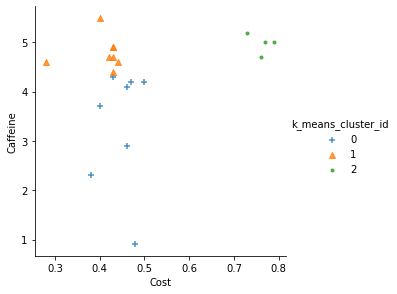

In [10]:
markers = ['+', '^', '.']
sn.lmplot("Cost", "Caffeine", data=df, hue ="k_means_cluster_id", fit_reg= False, markers=markers, height=4)

### Performing Agglomerative clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering
c = AgglomerativeClustering(n_clusters=3)
c = c.fit(feature_df)

In [12]:
df['aglo_cluster_id'] = c.labels_
df

,Name,Potassium,Sodium,Caffeine,Cost,k_means_cluster_id,aglo_cluster_id
0,new_england_coffee,144,15,4.7,0.43,1,1
1,post_alley_blend,151,19,4.9,0.43,1,1
2,stumpdown_coffee,157,15,0.9,0.48,0,0
3,bizzy_organic_coffee,170,7,5.2,0.73,2,2
4,indian_bean,152,11,5.0,0.77,2,2
5,jacobs_coffee,145,23,4.6,0.28,1,1
6,grounds_hounds_coffee,175,24,5.5,0.40,1,1
7,la_columbe_corisca,149,27,4.7,0.42,1,1
8,lavazza_super_crema,99,10,4.3,0.43,0,0
9,mount_hagen,113,8,3.7,0.40,0,0


#### Visualizing clusters made by Agglomerative Clustering

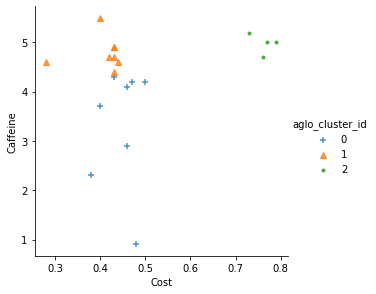

In [13]:
markers = ['+', '^', '.']
sn.lmplot("Cost", "Caffeine", data=df, hue ="aglo_cluster_id", fit_reg= False, markers=markers, height=4)

### Comparisons and other observations

In [14]:
df['k_means_cluster_id'].value_counts()

1    8
0    8
2    4
Name: k_means_cluster_id, dtype: int64

In [15]:
df['aglo_cluster_id'].value_counts()

1    8
0    8
2    4
Name: aglo_cluster_id, dtype: int64

#### Observation
The clusters made by both clustering mechanisms (k-Means and  Agglomerative Clustering) are the same.
Even though the clustering methods might be different, we are using the same parameter to divide the points into clusters i.e. **'Euclidean Distance'**, hence we are getting the same clusters.

As we can see below, the clusters formed by both methods are identical, even though they may differ by cluster ids.

In [16]:
df[df.k_means_cluster_id == 0]

,Name,Potassium,Sodium,Caffeine,Cost,k_means_cluster_id,aglo_cluster_id
2,stumpdown_coffee,157,15,0.9,0.48,0,0
8,lavazza_super_crema,99,10,4.3,0.43,0,0
9,mount_hagen,113,8,3.7,0.40,0,0
11,peerless_wholebean,102,15,4.1,0.46,0,0
12,stone_street_coffee,135,11,4.2,0.50,0,0
15,caribou_coffee,68,15,2.3,0.38,0,0
18,davidoff_coffee,72,6,2.9,0.46,0,0
19,js_coffee,97,7,4.2,0.47,0,0


In [17]:
df[df.k_means_cluster_id == 1]

,Name,Potassium,Sodium,Caffeine,Cost,k_means_cluster_id,aglo_cluster_id
0,new_england_coffee,144,15,4.7,0.43,1,1
1,post_alley_blend,151,19,4.9,0.43,1,1
5,jacobs_coffee,145,23,4.6,0.28,1,1
6,grounds_hounds_coffee,175,24,5.5,0.40,1,1
7,la_columbe_corisca,149,27,4.7,0.42,1,1
10,red_bay_coffee,140,18,4.6,0.44,1,1
16,irish_hazelnut_coffee,139,19,4.4,0.43,1,1
17,cremoso_coffee,144,24,4.9,0.43,1,1


In [18]:
df[df.k_means_cluster_id == 2]

,Name,Potassium,Sodium,Caffeine,Cost,k_means_cluster_id,aglo_cluster_id
3,bizzy_organic_coffee,170,7,5.2,0.73,2,2
4,indian_bean,152,11,5.0,0.77,2,2
13,green_mountain_coffee,150,19,4.7,0.76,2,2
14,koffee_cuit,149,6,5.0,0.79,2,2


### Visualizing the Dendrogram for Agglomerative Clustering

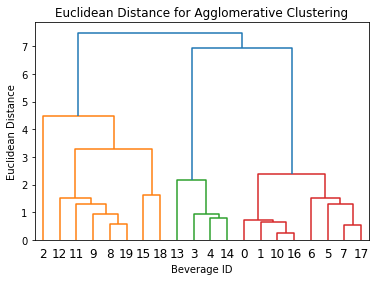

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
dend = linkage(feature_df, method = "ward")
dendrogram(dend)
plt.xlabel("Beverage ID")
plt.ylabel("Euclidean Distance")
plt.title('Euclidean Distance for Agglomerative Clustering')
plt.show()

#### NOTE:
The IDs shown in each cluster of the dendrogram is the same that we got by Agglomerative clustering, as shown below.

In [20]:
df[["Name", "aglo_cluster_id"]].sort_values(by=['aglo_cluster_id'])

,Name,aglo_cluster_id
9,mount_hagen,0
15,caribou_coffee,0
12,stone_street_coffee,0
11,peerless_wholebean,0
18,davidoff_coffee,0
8,lavazza_super_crema,0
19,js_coffee,0
2,stumpdown_coffee,0
7,la_columbe_corisca,1
5,jacobs_coffee,1
